In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test_ori=x_test
# 对输入图像进行预处理
x_train = x_train.reshape(-1, 28, 28, 1)

x_train = x_train.astype('float32') / 255.0

x_test = x_test.reshape(-1, 28, 28, 1)
x_test = x_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# 定义CNN模型
model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 定义 ModelCheckpoint 回调函数
checkpoint = tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True, save_weights_only=False, monitor='val_loss')

# 训练模型
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test),
                    callbacks=[checkpoint])
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
938/938 [==============================] - 11s 11ms/step - loss: 0.1782 - accuracy: 0.9463 - val_loss: 0.0529 - val_accuracy: 0.9838
Epoch 2/10
938/938 [==============================] - 10s 10ms/step - loss: 0.0544 - accuracy: 0.9825 - val_loss: 0.0410 - val_accuracy: 0.9868
Epoch 3/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 4/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.0339 - val_accuracy: 0.9880
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0315 - val_accuracy: 0.9897
Epoch 7/10
938/938 [==============================] - 13s 14ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0347 - val_accuracy:

(28, 28)
(1, 28, 28, 1)
预测结果： 6


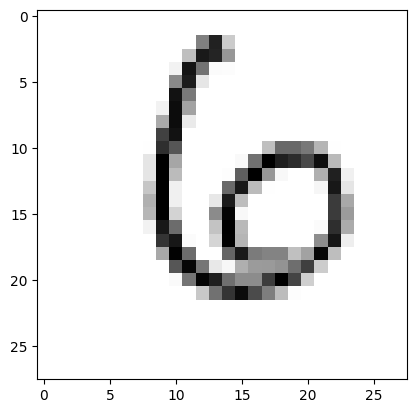

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# 加载MNIST数据集
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()
ori_x_test1=x_test1
model = tf.keras.models.load_model('./model.h5')
print(ori_x_test1[100].shape)
#需要将我们的数据转换为1行28*28的1个通道的灰度图，卷积神经网络必须要传入4维数据，-1就是让他自己算，数据排过去就
testdata = x_test1[100].reshape(-1, 28, 28, 1).astype('float32') / 255.0
print(testdata.shape)
predictions = model.predict(testdata)
print("预测结果：", np.argmax(predictions))

# 绘制第10个测试数据的图形
plt.imshow(ori_x_test1[100], cmap=plt.cm.binary)
plt.show()
